In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import netket as nk

/home/cwpark/acband-laughlin-instability/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


∣NK⟩ Tip: uv is a replacement for pip which helps you follow good software practices.

In [ ]:
from src.qm_utils.lattice.lattice import Lattice2D
from src.qm_utils.lattice.brillouin_zone import BrillouinZone2D
from src.netket_compat import get_sector_constraints
from src.acband import projected_hamiltonian

In [3]:
sqrt3 = np.sqrt(3)
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a_M = 1.0
a1 = a_M * e2
a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
lattice = Lattice2D(np.stack([a1, a2]))
b = (4 * np.pi) / (a_M * sqrt3)
b1, b2 = lattice.reciprocal_lattice_vectors
b3 = -(b1 + b2)

# N = 27 grid
t1 = (1 / 9) * (b1 - b2)
t2 = (1 / 9) * (b1 - b3)

sample_lattice_27 = Lattice2D(np.stack([t1, t2]))
bz_27 = BrillouinZone2D(lattice, sample_lattice_27)
N_s_27 = bz_27.n_samples

# N = 28 grid
p1 = b1 + t2 - t1
normb1 = np.linalg.norm(b1)
normp1 = np.linalg.norm(p1)
distb1p1 = np.linalg.norm(b1 - p1)
scale = normb1 / normp1
rot = -np.arccos((normb1 ** 2 + normp1 ** 2 - distb1p1 ** 2) / (2 * normb1 * normp1))
sample_lattice_28 = sample_lattice_27.transformed(scale=scale, rot=rot)

bz_28 = BrillouinZone2D(lattice, sample_lattice_28)
N_s_28 = bz_28.n_samples

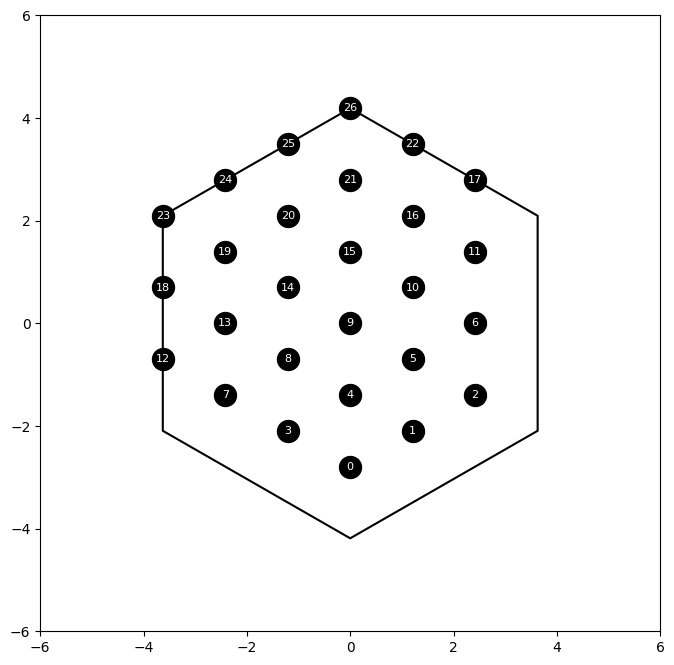

In [4]:
sampled_momentums = bz_27.sampled_momentums
R = 3 * np.linalg.norm(t1)
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
k_x = sampled_momentums[:, 0]
k_y = sampled_momentums[:, 1]
ax.scatter(k_x, k_y, s=250, c='k')
for i in range(N_s_27):
    x = k_x[i]
    y = k_y[i]
    ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')

ax.plot(hexagon_x, hexagon_y, color='k')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()

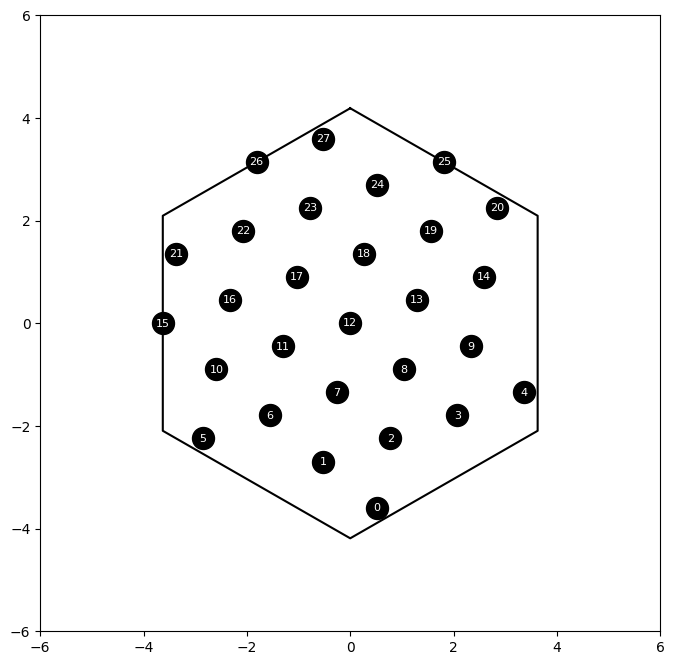

In [5]:
sampled_momentums = bz_28.sampled_momentums
R = 3 * np.linalg.norm(t1)
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
k_x = sampled_momentums[:, 0]
k_y = sampled_momentums[:, 1]
ax.scatter(k_x, k_y, s=250, c='k')
for i in range(N_s_28):
    x = k_x[i]
    y = k_y[i]
    ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')

ax.plot(hexagon_x, hexagon_y, color='k')

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.show()

In [ ]:
constraints = get_sector_constraints(bz_27, 18)
hilbs = [
    nk.hilbert.SpinOrbitalFermions(
        n_orbitals=27, s=0, n_fermions=18, constraint=constraint
    ) for constraint in constraints
]


In [15]:
for k_index, sector in enumerate(hilbs):
    print(f"Sector {k_index}:")
    print(f"  Total Momentum: {bz_27[k_index]}")
    print(f"  Dimension: {sector.n_states}")

Sector 0:
  Total Momentum: [ 0.        -2.7925268]
  Dimension: 173583
Sector 1:
  Total Momentum: [ 1.20919958 -2.0943951 ]
  Dimension: 173583
Sector 2:
  Total Momentum: [ 2.41839915 -1.3962634 ]
  Dimension: 173583
Sector 3:
  Total Momentum: [-1.20919958 -2.0943951 ]
  Dimension: 173583
Sector 4:
  Total Momentum: [ 0.        -1.3962634]
  Dimension: 173583
Sector 5:
  Total Momentum: [ 1.20919958 -0.6981317 ]
  Dimension: 173583
Sector 6:
  Total Momentum: [2.41839915 0.        ]
  Dimension: 173583
Sector 7:
  Total Momentum: [-2.41839915 -1.3962634 ]
  Dimension: 173583
Sector 8:
  Total Momentum: [-1.20919958 -0.6981317 ]
  Dimension: 173583
Sector 9:
  Total Momentum: [0. 0.]
  Dimension: 173613
Sector 10:
  Total Momentum: [1.20919958 0.6981317 ]
  Dimension: 173583
Sector 11:
  Total Momentum: [2.41839915 1.3962634 ]
  Dimension: 173583
Sector 12:
  Total Momentum: [-3.62759873 -0.6981317 ]
  Dimension: 173583
Sector 13:
  Total Momentum: [-2.41839915  0.        ]
  Dimens